The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


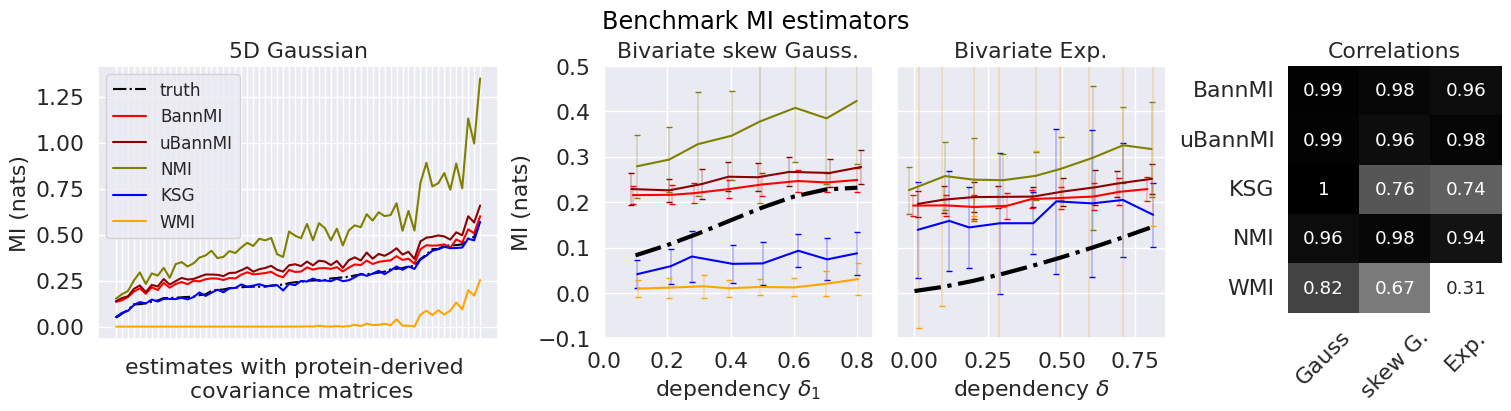

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(layout="constrained", figsize=(15, 4))
subfigs = fig.subfigures(1,3, wspace=0.01, width_ratios=[0.6,0.8,0.4])
fig.suptitle('Benchmark MI estimators', fontsize='xx-large')
#subfigs[1].suptitle('Benchmark skew Gaussians and Exponentials', fontsize='xx-large')
sns.set(font_scale=1.1)


#Gaussian plot 
ax1 = subfigs[0].subplots()
X = pd.read_hdf('~/nn_info_git/src/MI_gauss.h5', key='dim_5_k_1')
color = ['black', 'red', 'darkred', 'olive', 'blue', 'orange']
X.sort_values('truth', inplace = True)
X.columns = ['truth', 'BannMI', 'uBannMI', 'NMI','KSG', 'WMI']
x = np.arange(X.shape[0])
#ax1 = subsubfigs0[0].subplots()
for j, i in enumerate(['truth', 'BannMI', 'uBannMI', 'NMI','KSG', 'WMI']):
    if j == 0:
        ax1.plot(x,X.loc[:,i], label=i, color=color[j], linestyle='dashdot')
    else:
        ax1.plot(x,X.loc[:,i], label=i, color=color[j])
#plt.legend()
#box = ax1[0].get_position()
#ax1[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.set_xlabel('sorted cell lines')
ax1.set_ylabel('MI (nats)', fontsize='large')
ax1.tick_params(axis='both', which='major', labelsize='large')
# Put a legend to the right of the current axis
#ax1[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-large')
ax1.legend()
ax1.set_title('5D Gaussian', fontsize='large')
ax1.set_xticks(x)
ax1.set_xticklabels([])
ax1.set_xlabel('estimates with protein-derived \n covariance matrices', fontsize = 'large')







#skew plot
ax2 = subfigs[1].subplots(1,2, sharey = True)
SG = pd.read_csv('~/nn_info_git/src/MI_skew.csv')
SG.drop('Unnamed: 0', inplace=True, axis = 1)
SG_sd = pd.read_csv('~/nn_info_git/src/SD_skew.csv')
SG_sd.drop('Unnamed: 0', inplace=True, axis = 1)

color = ['red', 'darkred', 'blue', 'olive', 'orange']

#fig, ax = plt.subplots()
for i in range(1,6):
    ax2[0].errorbar(np.random.normal(range(1,9),0.1),SG.iloc[:,i], SG_sd.iloc[:,i-1],
                elinewidth=0.3, capsize=2, color=color[i-1], label=SG.columns[i])
    
ax2[0].plot(range(1,9), SG.iloc[:,0], color='black', label='numeric', linestyle='dashdot', linewidth=3)
ax2[0].tick_params(axis='both', which='major', labelsize='large')
xlab = [0., 0.2,0.4,0.6,0.8]
xlab = [str(np.round(i,1)) for i in xlab]
ax2[0].set_xticks([0,2,4,6,8])
ax2[0].set_xticklabels(list(xlab))
ax2[0].set_xlabel('dependency $\delta_1$', fontsize='large')
ax2[0].set_title('Bivariate skew Gauss.', fontsize='large')
ax2[0].set_ylabel('MI (nats)', fontsize='large')













#exp plot
MV_exp = pd.read_csv('~/nn_info_git/src/MV_expo.csv')
MV_exp.drop('Unnamed: 0', inplace=True, axis = 1)
MV_exp_sd = pd.read_csv('~/nn_info_git/src/MV_expo_sd.csv')
MV_exp_sd.drop('Unnamed: 0', inplace=True, axis = 1)
MV_exp.columns = ['KSG', 'BannMI', 'uBannMI', 'NMI', 'WMI', 'num']
MV_exp_sd.columns = ['KSG', 'BannMI', 'uBannMI', 'NMI', 'WMI']
MV_exp_sd.mean(axis=0)
color = ['blue', 'red', 'darkred', 'olive', 'orange', 'black']
n = np.arange(MV_exp.shape[0])*0.1

for j, i in enumerate(['KSG', 'BannMI', 'uBannMI', 'NMI', 'WMI', 'num']):
    if j < 5:
        ax2[1].errorbar(np.random.normal(n, 0.01),MV_exp.loc[:,i], MV_exp_sd.loc[:,i], 
                    color=color[j], label=i, elinewidth=0.3, capsize=2)
        #ax.plot(n,MV_exp.loc[:,i], color=color[j])
    else:
        ax2[1].plot(n,MV_exp.loc[:,i], color=color[j], linestyle='dashdot', linewidth=3)
ax2[1].set_ylim(-0.1,0.5)
#ax2[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')
ax2[1].set_xlabel('dependency $\delta$', fontsize='large')
ax2[1].tick_params(axis='both', which='major', labelsize='large')
xlab = 0.1*np.arange(1,9)
xlab = [str(np.round(i,1)) for i in xlab]

#ax2.grid()
#ax.set_ylim(-0.1,0.8)
ax2[1].set_title('Bivariate Exp.', fontsize='large')











#skew and exp correlation
MV_exp = MV_exp.loc[:,SG.columns]
MV_exp.corr().iloc[:,0]

ax3 = subfigs[2].subplots()
X.columns = ['num', 'BannMI', 'uBannMI', 'NMI', 'KSG', 'WMI']
COR_sgme = pd.concat((X.loc[:,['num', 'BannMI', 'uBannMI', 'KSG', 'NMI', 'WMI']].corr().iloc[:,0], SG.corr().iloc[:,0],MV_exp.corr().iloc[:,0]), axis = 1)
COR_sgme.columns = ['Gauss','skew G.', 'Exp.']
g = sns.heatmap(COR_sgme.iloc[1:,:], annot=True, cbar = False, cmap = 'binary', ax = ax3)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 'large')
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 'large')
ax3.set_title('Correlations', fontsize='large')
fig.savefig('benchmark.eps', format = 'eps', bbox_inches='tight', dpi=350)
plt.show()

In [2]:
X.columns

Index(['num', 'BannMI', 'uBannMI', 'NMI', 'KSG', 'WMI'], dtype='object')